In [ ]:
%ls

'전력+사용량(용도별)_20221130160834.csv'   sample_data/


In [ ]:
columns = '소계	 소계	 소계	 소계	 전철	 수도	 사업자용	 순수서비스	 소계	 농립어업	 광업	 제조업	 소계	 소계	 소계	 소계	 전철	 수도	 사업자용	 순수서비스	 소계	 농립어업	 광업	 제조업	 소계	 소계	 소계	 소계	 전철	 수도	 사업자용	 순수서비스	 소계	 농립어업	 광업	 제조업'.split('\t ')

In [ ]:
import pandas as pd
use_elec_pd = pd.read_csv('electricity.csv', header = [0,1,2,3])

In [ ]:
columns = set([c[0] for idx, c in enumerate(use_elec_pd.columns) if idx>=3])
columns

{'2021. 10', '2021. 11', '2021. 12'}

In [ ]:
total_list = [use_elec_pd[i]['합계']['소계']['소계'][0] for i in columns]

In [ ]:
total_list

[3578614, 3537141, 3963700]

In [ ]:
from collections import defaultdict
kind_elect = defaultdict(list)
total = []
index = []
for date in columns:
  index.append(date)
  total.append(use_elec_pd[date]['합계']['소계']['소계'][0])
  sec_columns = use_elec_pd[date]['합계'].columns
  sec_columns = set([value[0] for idx,value in enumerate(sec_columns) if value!='소계'])
  # print(sec_columns)
  
  for kind in sec_columns:
    if kind != '소계':
      kind_elect[kind].append(use_elec_pd[date]['합계'][kind]['소계'][0])

In [ ]:
index, total, kind_elect

(['2021. 10', '2021. 11', '2021. 12'],
 [3578614, 3537141, 3963700],
 defaultdict(list,
             {'산업용': [110820, 115192, 128338],
              '가정용': [1106205, 1101163, 1146475],
              '서비스업': [2107191, 2050450, 2352648],
              '공공용': [254397, 270336, 336239]}))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_

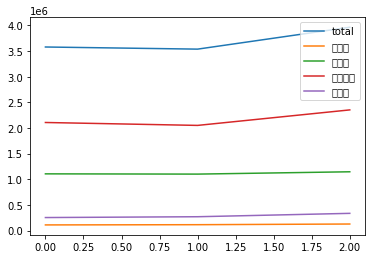

In [ ]:
import matplotlib.pyplot as plt
plt.plot(total, label='total')
for key, value in kind_elect.items():
  plt.plot(value, label=key)
plt.legend()
plt.show()